# Exercise 1: Familiarize yourself with `pandas`
If you are new to Python, check out the introductory Python courses available through Caltrans's LinkedIn Learning Library:
* https://www.linkedin.com/learning/search?keywords=python&u=36029164

Skills: 
* `pandas` is one of the base Python packages for working with tabular data.
* Do some grouping and aggregation. Many ways to do this!
* Export to Google Cloud Storage
* Practice committing on GitHub

References: 
* https://docs.calitp.org/data-infra/analytics_new_analysts/01-data-analysis-intro.html
* https://docs.calitp.org/data-infra/analytics_tools/saving_code.html

In [4]:
from siuba import *
from siuba.data import mtcars

import pandas as pd

## Groupby / Aggregation

* By cylinder categories, calculate the average mpg and find difference between max and min weight.
* Hint: for `pandas`: `groupby / agg`, `pivot_table`, `groupby / transform`
* Hint: for `siuba`: `groupby`, `summarize`

In [7]:
#Check type of data
type(mtcars)

pandas.core.frame.DataFrame

In [8]:
#Look into the data
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [9]:
#First 5 row
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [10]:
#Last 5 rows
mtcars.tail()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [11]:
#Random sample
mtcars.sample(3)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
21,15.5,8,318.0,150,2.76,3.52,16.87,0,0,3,2
14,10.4,8,472.0,205,2.93,5.25,17.98,0,0,3,4
9,19.2,6,167.6,123,3.92,3.44,18.30,1,0,4,4


In [16]:
#Choose any row
mtcars.loc[5:10]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.57,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.19,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.15,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.44,18.30,1,0,4,4
10,17.8,6,167.6,123,3.92,3.44,18.90,1,0,4,4


In [5]:
#By cylinder categories, calculate the average mpg
df2=mtcars.groupby(['cyl']).agg({'mpg':'mean'})

In [6]:
#with reset index
df3=mtcars.groupby(['cyl']).agg({'mpg':'mean'}).reset_index()

In [7]:
df2

,mpg
cyl,
4,26.663636
6,19.742857
8,15.100000


In [8]:
df3

,cyl,mpg
0,4,26.663636
1,6,19.742857
2,8,15.100000


In [21]:
mtcars.groupby(['cyl']).agg({'mpg':'mean'}).reset_index()

,cyl,mpg
0,4,26.663636
1,6,19.742857
2,8,15.100000


In [22]:
df2.columns

Index(['mpg'], dtype='object')

In [23]:
df3.columns

Index(['cyl', 'mpg'], dtype='object')

In [24]:
# find difference between max and min weight.
min = wt[0]
max = wt[0]

for i in range(len(wt)):
    if wt[i] > max:
        max = wt[i]
    elif wt[i] < min:
        min = wt[i]
print("Min:",min)
print("Max:",max)

NameError: name 'wt' is not defined

In [27]:
print (max(wt))

NameError: name 'wt' is not defined

In [29]:
print(mtcars['wt'].max())

5.424


In [30]:
Max=mtcars['wt'].max()
print (Max)

5.424


In [9]:
Max=mtcars['wt'].max()
Min=mtcars['wt'].min()
Dif=Max-Min
print (Dif)

3.9110000000000005


In [32]:
print(Min)

1.513


## Functions

* Create a new column using a lambda function and tag 6 cylinder values with "six", and all other values as "other"
* Write a function that tags each cylinder value with the word (ex: 6 as "six", 8 as "eight")

In [10]:
def cyl_number(row):
    if row.cyl == 6:
        return 'six'
    else:
        return 'other'
mtcars['ncyl'] = mtcars.apply(cyl_number, axis = 1)

mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,ncyl
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,six
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,six
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,other
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,six
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,other
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,six
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,other
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,other
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,other
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,six


In [16]:
def cyl_number(row):
    if row.cyl == 6:
        return 'six'
    else:
        return 'other'
mtcars['number'] = mtcars.apply(cyl_number, axis =1)
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,ncyl,number
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,six,six
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,six,six
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,other,other
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,six,six
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,other,other
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,six,six
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,other,other
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,other,other
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,other,other
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,six,six


In [17]:
mtcars['cyl_number'] = mtcars.apply(lambda row: 'six' if row.cyl == 6
                else 'other', axis = 1)

In [38]:
def cyl_number(row):
    if row.cyl == 6:
        return 'six'
    else:
        return 'other'
mtcars['ncyl'] = mtcars.apply(lambda row:
    cyl_number(row), axis = 1)

mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,ncyl
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,six
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,six
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,other
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,six
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,other
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,six
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,other
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,other
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,other
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,six


## Export to Google Cloud Storage (GCS)

* Make sure credential works
* Use this path: "gs://calitp-analytics-data/data-analyses/FILENAME"
* Export using `df.to_parquet()` and `df.to_csv()`

In [18]:
#relative path vs absolute path
mtcars.to_csv('./data/excercise1.csv')

In [1]:
pwd

'/home/jovyan/data-analyses/starter_kit'

In [ ]:
mtcars.to_csv('./test/excercise1.csv')

In [ ]:
filename = "./data/filename.csv"
filename2 = "data/filename.csv"

In [ ]:
filename3 = "../filename.csv"

In [3]:
# absolute path: C:\\Windows\snumber\Documets\Word\

In [19]:
mtcars.to_parquet('./data/excercise1.parquet')

## Make a chart

* Read in the parquet file from GCS.
* Make a visualization using one of the charting packages.
* Name this notebook `YOURNAME_exercise1.ipynb`
    * If you need to rename because you already named it, do it within the terminal.
    * `git mv OLDNAME.ipynb NEWNAME.ipynb`. 
    * The `mv` stands for move, and renaming a file is basically "moving" its path. Doing it this way retains the git history associated with the notebook. If you rename directly with right click, rename, you destroy the git history.
* Use a descriptive commit message (ex: adding chart, etc). GitHub already tracks who makes the commit, the date, the timestamp of it, the files being affected, so your commit message should be more descriptive than the metadata already stored.

In [20]:
df = pd.read_parquet('./data/excercise1.parquet')

In [22]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,ncyl,number,cyl_number
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,six,six,other
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,six,six,other
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,other,other,other
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,six,six,other
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,other,other,other


<AxesSubplot:xlabel='cyl'>

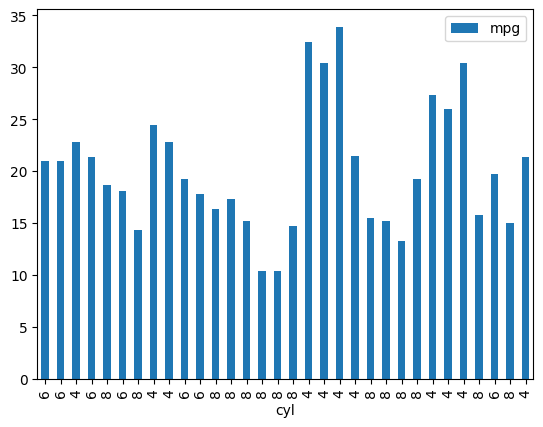

In [24]:
df.plot(x='cyl', y='mpg', kind='bar')

In [ ]:
git mv OLDNAME.ipynb NEWNAME.ipynb